# Analizando datos

Trabajaremos con un conjunto de datos sobre diabetes extraído de [Diabetes](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

El conjunto de datos consta de varias variables predictoras médicas (independientes) y una variable objetivo (dependiente): Resultado. Esta variable objetivo es igual a 1 si tiene diabetes y 0 en caso contrario.

Las variables independientes incluyen el número de embarazos que ha tenido la paciente, su IMC, nivel de insulina, edad, etc.

#### 1- Usando la librería ``pandas`` 

leer el archivo ``diabetes.csv`` y asignar el contenido a una variable que llamaremos ``datos``, luego visualizar los primeros registros ``datos.head()``

***- Importación de las librerias***

In [1]:
# importando
import pandas as pd

In [2]:
import matplotlib.pyplot as plt


In [3]:
pd.read_csv('datos/diabetes.csv', sep=',')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,171.000,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,245.000,30,0
766,1,126,60,0,0,30.1,349.000,47,1


***- Guardando los datos en la variable ``datos ``***

In [4]:
# guardando los datos en la variable datos
datos = pd.read_csv("datos/diabetes.csv", sep=",")

In [5]:
# Se visualizan los primeros registros
datos.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 2- Visualizar la dimensión del DataFrame ``datos``
Cuantas filas y cuantas columnas tiene el dataset?

In [6]:
#Verifico el tipo de dato
type(datos)

pandas.core.frame.DataFrame

***- Guardo las dimensiones del dataFrame en ``datos ``***

In [7]:
totalColumnas = len(datos.columns) 
totalFilas = len(datos)

In [8]:
# Guardo las dimensiones del datadrame datos
print("Total filas y columnas:","(",totalFilas,",",totalColumnas,")")

Total filas y columnas: ( 768 , 9 )


#### 3- Muestre la información del conjunto de datos:
¿Tiene valores faltantes? 

***- Teniendo en cuenta la tabla resultante puedo verificar
que en las 9 columnas se utilizan los 768 datos de entrada en cada registro, es decir 
no hay valores faltantes en ninguna columna***

In [9]:
# con data.info() verifico el numero total de elementos que tiene not-null
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### 4- Renombrar los nombres de las columnas como sigue:
    Pregnancies => embarazos
    Glucose => glucosa
    BloodPressure => presionArterial
    SkinThickness => espesorPiel
    Insulin => insulina
    BMI => bmi
    DiabetesPedigreeFunction => diabetesPedigree
    Age => edad
    Outcome => resultado

***- Renombro cada columna con el nuevo nombre***

In [10]:
datos.columns = ['embarazos','glucosa','presionArterial','espesorPiel','insulina','bmi','diabetesPedigree','edad','resultado']

In [11]:
# Verifico si se actualizo los nuevos nombres de las columnas
datos.columns

Index(['embarazos', 'glucosa', 'presionArterial', 'espesorPiel', 'insulina',
       'bmi', 'diabetesPedigree', 'edad', 'resultado'],
      dtype='object')

## Explorar los datos
Estamos analizando y explorando los datos por medio de medidas descriptivas y visualizaciones. 

#### 5- Visualizar la cantidad registros por ``resultado`` 
¿Cuántos registros corresponden a cada resultado?

***- Realizando un conteo de la columna resultado verifico que hay 500 resultados para ``0`` y ``268`` resultados para 1, es
decir ``268 personas`` tienen ``diabete`` y ``500 caso contrario``***

In [12]:
datos.resultado.value_counts()

0    500
1    268
Name: resultado, dtype: int64

#### 6- Mostrar información de resumen estadístico de los datos 

***- Realizando un resumen completo con la función ``describe()``***

In [13]:
datos.describe()

,embarazos,glucosa,presionArterial,espesorPiel,insulina,bmi,diabetesPedigree,edad,resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,347.079349,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,254.431659,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,165.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,295.500000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,527.250000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,997.000000,81.000000,1.000000


In [14]:
# Numero total las edades de la muestra sin repetir
datos.edad.unique()
print(len(datos.edad.unique()))

52


In [15]:
# Cantidad de veces que se repiten las edades
datos.edad.value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: edad, dtype: int64

In [16]:
# Todos los datos del registro insulina sin repetir
datos.insulina.unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [17]:
#Impresion de la tabla datos
datos

,embarazos,glucosa,presionArterial,espesorPiel,insulina,bmi,diabetesPedigree,edad,resultado
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,171.000,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,245.000,30,0
766,1,126,60,0,0,30.1,349.000,47,1


#### 7- ¿Cuál atributo tiene mayor dispersión en sus datos?

In [27]:
#Guardo el al variable df 
df = pd.DataFrame(data=datos)

In [28]:
#Resumen de los datos
df.describe()

,embarazos,glucosa,presionArterial,espesorPiel,insulina,bmi,diabetesPedigree,edad,resultado,index_column
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,347.079349,33.240885,0.348958,383.500000
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,254.431659,11.760232,0.476951,221.846794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,165.000000,24.000000,0.000000,191.750000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,295.500000,29.000000,0.000000,383.500000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,527.250000,41.000000,1.000000,575.250000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,997.000000,81.000000,1.000000,767.000000


In [29]:
# Verifico los datos sin repetir de cada columna e imprimo
# Uso la funcion unique y uso las columnas en este caso axis=0 que son 9 y verifico los valores unicos sin repetir
registros = df.apply(pd.unique, axis=0)
print(registros[:-2])

embarazos           [6, 1, 8, 0, 5, 3, 10, 2, 4, 7, 9, 11, 13, 15,...
glucosa             [148, 85, 183, 89, 137, 116, 78, 115, 197, 125...
presionArterial     [72, 66, 64, 40, 74, 50, 0, 70, 96, 92, 80, 60...
espesorPiel         [35, 29, 0, 23, 32, 45, 19, 47, 38, 30, 41, 33...
insulina            [0, 94, 168, 88, 543, 846, 175, 230, 83, 96, 2...
bmi                 [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35....
diabetesPedigree    [627.0, 351.0, 672.0, 167.0, 2.288, 201.0, 248...
edad                [50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 5...
dtype: object


In [30]:
# Uso la funcion apply para verificar el tamaño de cada registro y ver la cantidad de datos sin repetir
totalSinRepetir = registros.apply(len)

***- En este caso ``diabetesPedigree`` cuenta con 517 datos distintos y es el mayor por tanto es el atributo que tiene mayor dispersión***

In [31]:
print(totalSinRepetir[:-2])

embarazos            17
glucosa             136
presionArterial      47
espesorPiel          51
insulina            186
bmi                 248
diabetesPedigree    517
edad                 52
dtype: int64


In [32]:
# Saco el mayo con la funcion max
# Saco el nombre del atributo con mayor dispersión
print(totalSinRepetir[:-2].max())
print(totalSinRepetir[:-2].idxmax())

517
diabetesPedigree


***- Se puede verificar como ejemplo ``diabetesPedigree`` y ``edad`` donde se ve que la dispersión en ``diabetesPedigree`` esta mejor distribuida y en ``edad`` los datos estan mas juntos, es decir se repiten***

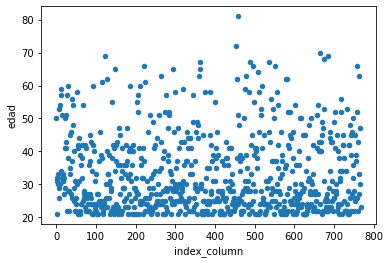

In [49]:
df['index_column'] = df.index
dispersion_edad = df.plot.scatter(x="index_column",y="edad")

<AxesSubplot:xlabel='index_column', ylabel='diabetesPedigree'>

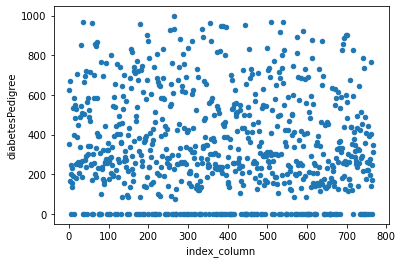

In [50]:
df.plot.scatter(x="index_column",y="diabetesPedigree")

#### 8- Visualizar cada atributo usando el gráfico de caja
Referencia: [Chart Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) 

***- Se realizan los 9 graficos usando la libreria seaborn***

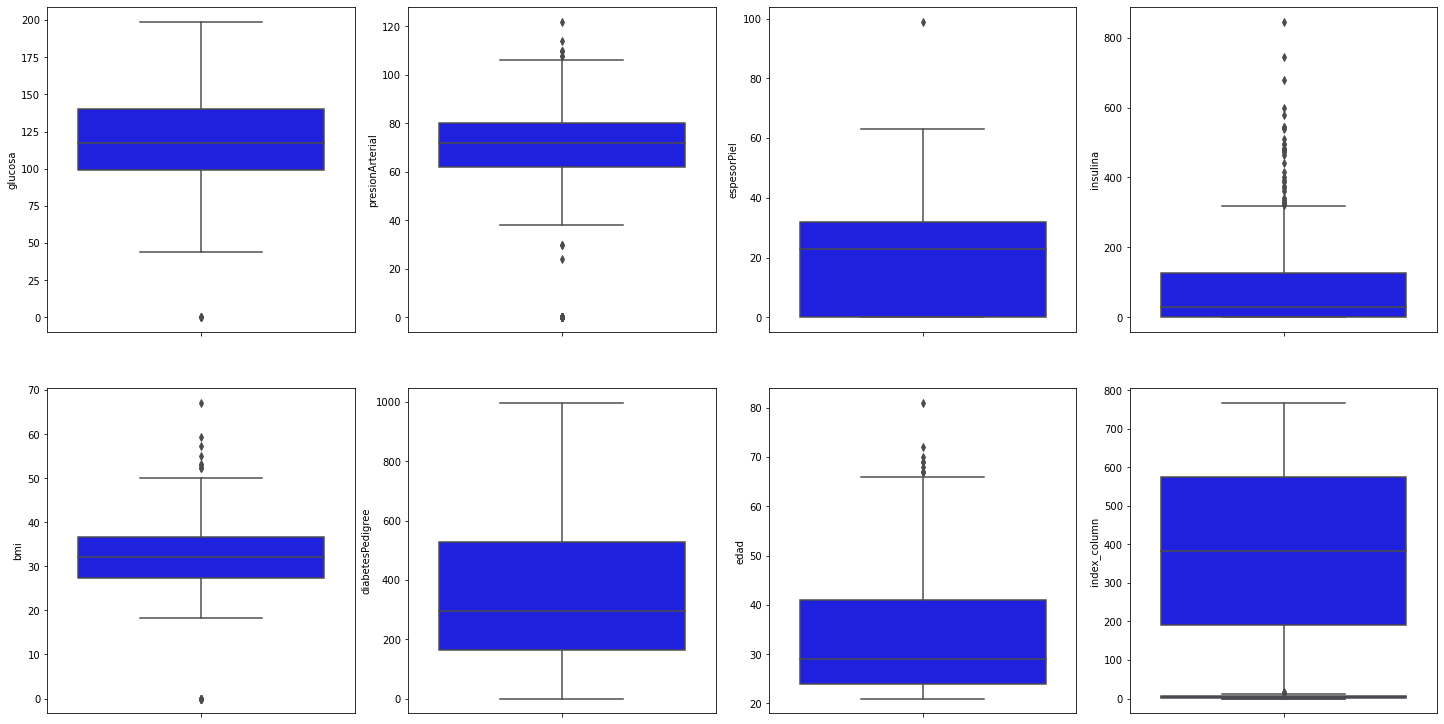

In [53]:
import seaborn as sns
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if(value.name != "id" and value.name != 'resultado'):
        sns.boxplot(y=col, data=df, color='b', ax=ax[index-1])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

#### 9- Grafique la distribución de frecuencias de los datos de la columna ``insulina``

     Insulina  Cantidad
0           0       374
1         105        11
2         130         9
3         140         9
4         120         8
..        ...       ...
181        73         1
182       171         1
183       255         1
184        52         1
185       112         1

[186 rows x 2 columns]


<AxesSubplot:xlabel='Insulina'>

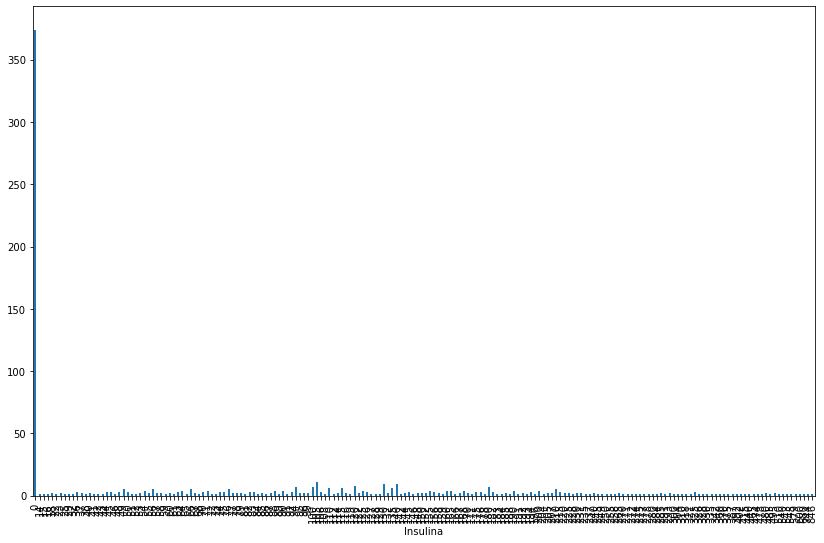

In [59]:
a = datos['insulina'].value_counts()
a= a.to_frame().reset_index()
a.columns=['Insulina','Cantidad']
print(a)
graf=a.sort_values(by=['Insulina'])
graf.plot(stacked=True,x='Insulina',y='Cantidad',kind='bar',legend=False,figsize=(14, 9))



#### 10- Visualizar la columna ``resultado`` en forma gráfica. Cantidad de 0 y 1.
Referencia: [Chart Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) 

Usar gráfico 'pie' 

<AxesSubplot:ylabel='resultado'>

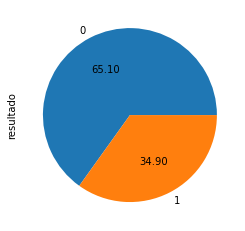

In [55]:
a= datos.resultado.value_counts()
a.plot.pie(autopct="%.2f")

#### 11- Seleccione los registros que tienen diabetes (resultado == 1) y no tienen diabetes (resultado == 0)

In [58]:
tieneDiabetes = datos['resultado'] == 1
notieneDiabetes = datos['resultado'] == 0
print(datos[tieneDiabetes])
print(datos[notieneDiabetes])


     embarazos  glucosa  presionArterial  espesorPiel  insulina   bmi  \
0            6      148               72           35         0  33.6   
2            8      183               64            0         0  23.3   
4            0      137               40           35       168  43.1   
6            3       78               50           32        88  31.0   
8            2      197               70           45       543  30.5   
..         ...      ...              ...          ...       ...   ...   
755          1      128               88           39       110  36.5   
757          0      123               72            0         0  36.3   
759          6      190               92            0         0  35.5   
761          9      170               74           31         0  44.0   
766          1      126               60            0         0  30.1   

     diabetesPedigree  edad  resultado  index_column  
0             627.000    50          1             0  
2            

#### 12- Realice un resumen estadístico de los que tienen diabetes

In [42]:
datos[tieneDiabetes].describe()

,embarazos,glucosa,presionArterial,espesorPiel,insulina,bmi,diabetesPedigree,edad,resultado,index_column
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0,268.000000
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,379.063399,37.067164,1.0,369.817164
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,273.498889,10.968254,0.0,228.158464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000,21.000000,1.0,0.000000
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,178.000000,28.000000,1.0,187.750000
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,343.500000,36.000000,1.0,352.000000
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,583.750000,44.000000,1.0,581.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,968.000000,70.000000,1.0,766.000000


#### 13-  Realice un resumen estadístico de los que NO tienen diabetes

In [43]:
datos[notieneDiabetes].describe()

,embarazos,glucosa,presionArterial,espesorPiel,insulina,bmi,diabetesPedigree,edad,resultado,index_column
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0,500.000000
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,329.935898,31.190000,0.0,390.834000
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,242.147038,11.667655,0.0,218.266881
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.0,1.000000
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,163.500000,23.000000,0.0,199.000000
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,284.000000,27.000000,0.0,404.000000
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,487.250000,37.000000,0.0,572.250000
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,997.000000,81.000000,0.0,767.000000


#### 14- Para los que tienen Diabetes: grafique la estimación de densidad de las edades.
Use el gráfico 'kde'

<AxesSubplot:ylabel='Density'>

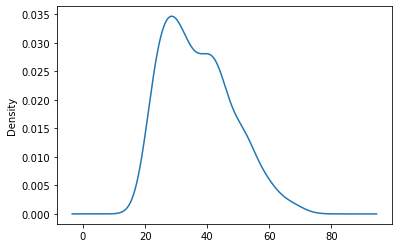

In [44]:
datos[tieneDiabetes].edad.plot.kde()

#### 15- Para los que NO tienen Diabetes: grafique la estimación de densidad de las edades.


<AxesSubplot:ylabel='Density'>

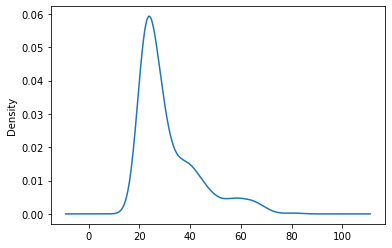

In [45]:
datos[notieneDiabetes].edad.plot.kde()

#### 16- Guardar el DataFrame de lo que tienen Diabetes en un archivo, que llamaremos datos_con_diabetes.csv, en formato csv y sin el índice.

In [46]:
 datos[seleccion1].to_csv('datos_con_diabetes.csv', sep = ',', index = False)

¿Que otras preguntas podría responder en la exploración de este conjunto de datos?

***- Se puede ver claramente que 35% de la población de los datos tienen diabates y de los cuales la edad esta
comprendida entre 20 a 60 años con picos mayores, tambien se puede ver los valores maximos,minimos, promedios, insulina entre otros en el resumen estadisticos de los que tienen y no tienen diabetes***